### 개와 늑대 분류

In [6]:
from glob import glob
import os

root = './datasets/animals/original'

directories = glob(os.path.join(root, '*'))

# directory 폴더 명 확인
for directory in directories:
    print(directory[directory.rindex('\\')+1:])
    

dogs
wolves


In [7]:
root = './datasets/animals/original'

directories = glob(os.path.join(root, '*'))
directory_names = []
for directory in directories:
    directory_names.append(directory[directory.rindex('\\')+1:])

print(directory_names)

['dogs', 'wolves']


- 파일명 변경
  > n02085620_588.jpg -> dogs1.png

In [9]:
root = './datasets/animals/original/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i+1) + '.png')

        os.rename(old_file, new_file)

ImageGenerator를 이용하여 train, test, validation 데이터로 분리

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size = (250, 250), batch_size=32, class_mode='binary')
print(generator.class_indices)

Found 2000 images belonging to 2 classes.
{'dogs': 0, 'wolves': 1}


pandas를 이용하여 train, test, validation으로 split

In [13]:
import pandas as pd

a_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets':generator.classes})
a_df

,file_paths,targets
0,./datasets/animals/original/dogs\dogs1.png,0
1,./datasets/animals/original/dogs\dogs10.png,0
2,./datasets/animals/original/dogs\dogs100.png,0
3,./datasets/animals/original/dogs\dogs1000.png,0
4,./datasets/animals/original/dogs\dogs101.png,0
...,...,...
1995,./datasets/animals/original/wolves\wolves995.png,1
1996,./datasets/animals/original/wolves\wolves996.png,1
1997,./datasets/animals/original/wolves\wolves997.png,1
1998,./datasets/animals/original/wolves\wolves998.png,1


\ 백슬래쉬를 / 슬래쉬로 변경

In [14]:
a_df.loc[:, 'file_paths'] = a_df.file_paths.apply(lambda x: x.replace('\\', '/'))
a_df

,file_paths,targets
0,./datasets/animals/original/dogs/dogs1.png,0
1,./datasets/animals/original/dogs/dogs10.png,0
2,./datasets/animals/original/dogs/dogs100.png,0
3,./datasets/animals/original/dogs/dogs1000.png,0
4,./datasets/animals/original/dogs/dogs101.png,0
...,...,...
1995,./datasets/animals/original/wolves/wolves995.png,1
1996,./datasets/animals/original/wolves/wolves996.png,1
1997,./datasets/animals/original/wolves/wolves997.png,1
1998,./datasets/animals/original/wolves/wolves998.png,1


먼저 훈련데이터와 테스트데이터로 분리

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(a_df.file_paths, a_df.targets, stratify=a_df.targets, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_test.value_counts())

targets
1    800
0    800
Name: count, dtype: int64
targets
1    200
0    200
Name: count, dtype: int64


훈련데이터를 다시 훈련 데이터와 검증 데이터로 분리

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_val.value_counts())

targets
0    640
1    640
Name: count, dtype: int64
targets
0    160
1    160
Name: count, dtype: int64


훈련, 테스트, 검증 데이터로 분리된 데이터를 폴더에 담고 복사합니다.

In [20]:
import shutil

root = './datasets/animals/'

for file_path in X_train:
    print(file_path[len(root + 'original/'): file_path.rindex('/')])
    animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

dogs
wolves
dogs
dogs
dogs
wolves
dogs
dogs
wolves
dogs
dogs
wolves
dogs
wolves
dogs
dogs
wolves
wolves
dogs
dogs
dogs
wolves
wolves
dogs
wolves
dogs
dogs
dogs
wolves
wolves
wolves
wolves
wolves
wolves
wolves
dogs
dogs
dogs
wolves
wolves
wolves
dogs
wolves
dogs
wolves
wolves
dogs
wolves
wolves
wolves
dogs
wolves
wolves
dogs
dogs
wolves
dogs
dogs
dogs
wolves
wolves
dogs
wolves
wolves
dogs
wolves
wolves
wolves
wolves
dogs
wolves
wolves
dogs
dogs
wolves
dogs
dogs
wolves
wolves
dogs
wolves
wolves
dogs
wolves
dogs
wolves
wolves
wolves
dogs
dogs
wolves
dogs
dogs
wolves
dogs
dogs
dogs
wolves
dogs
dogs
dogs
wolves
wolves
dogs
dogs
dogs
dogs
dogs
wolves
wolves
dogs
dogs
dogs
wolves
dogs
wolves
dogs
wolves
dogs
dogs
dogs
wolves
dogs
dogs
wolves
wolves
wolves
wolves
wolves
wolves
wolves
dogs
dogs
wolves
dogs
dogs
dogs
wolves
dogs
wolves
wolves
dogs
wolves
dogs
dogs
wolves
wolves
wolves
wolves
wolves
dogs
wolves
dogs
wolves
dogs
dogs
dogs
wolves
dogs
dogs
dogs
dogs
wolves
dogs
wolves
wolves
dogs
w

In [21]:
import shutil

root = './datasets/animals/'

for file_path in X_test:
    print(file_path[len(root + 'original/'): file_path.rindex('/')])
    animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'test/' + animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

wolves
dogs
dogs
dogs
wolves
dogs
dogs
wolves
dogs
wolves
wolves
dogs
dogs
wolves
dogs
wolves
wolves
wolves
wolves
wolves
wolves
dogs
wolves
wolves
dogs
wolves
dogs
dogs
dogs
dogs
wolves
dogs
dogs
dogs
dogs
wolves
wolves
dogs
wolves
wolves
wolves
dogs
dogs
dogs
dogs
dogs
wolves
wolves
wolves
wolves
wolves
wolves
wolves
dogs
wolves
dogs
dogs
wolves
wolves
dogs
wolves
dogs
wolves
dogs
wolves
wolves
wolves
wolves
wolves
dogs
wolves
dogs
wolves
wolves
wolves
dogs
wolves
dogs
wolves
wolves
dogs
wolves
wolves
dogs
wolves
dogs
dogs
wolves
dogs
dogs
wolves
wolves
wolves
wolves
wolves
wolves
wolves
wolves
dogs
dogs
dogs
dogs
dogs
wolves
dogs
dogs
dogs
wolves
wolves
dogs
wolves
wolves
wolves
wolves
dogs
dogs
wolves
dogs
wolves
wolves
wolves
wolves
dogs
dogs
dogs
wolves
wolves
dogs
wolves
dogs
dogs
dogs
wolves
dogs
dogs
wolves
wolves
dogs
wolves
wolves
dogs
wolves
wolves
dogs
wolves
dogs
dogs
wolves
dogs
dogs
wolves
wolves
wolves
dogs
wolves
dogs
dogs
wolves
dogs
dogs
dogs
dogs
dogs
wolves
wolves

In [22]:
import shutil

root = './datasets/animals/'

for file_path in X_val:
    print(file_path[len(root + 'original/'): file_path.rindex('/')])
    animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

dogs
dogs
dogs
wolves
dogs
dogs
wolves
wolves
wolves
dogs
wolves
dogs
dogs
dogs
wolves
wolves
wolves
dogs
wolves
dogs
wolves
dogs
wolves
dogs
dogs
wolves
wolves
dogs
dogs
wolves
dogs
dogs
wolves
dogs
dogs
dogs
wolves
dogs
wolves
dogs
dogs
wolves
wolves
dogs
wolves
dogs
wolves
wolves
dogs
wolves
dogs
dogs
dogs
dogs
wolves
wolves
dogs
wolves
dogs
wolves
dogs
wolves
wolves
dogs
wolves
wolves
dogs
dogs
wolves
wolves
wolves
wolves
wolves
dogs
dogs
dogs
dogs
dogs
dogs
wolves
dogs
wolves
dogs
dogs
dogs
dogs
wolves
dogs
dogs
wolves
dogs
wolves
wolves
dogs
dogs
dogs
wolves
wolves
dogs
dogs
dogs
dogs
dogs
dogs
dogs
wolves
dogs
wolves
wolves
wolves
wolves
dogs
wolves
wolves
dogs
dogs
dogs
wolves
wolves
wolves
wolves
dogs
dogs
dogs
dogs
wolves
wolves
dogs
dogs
wolves
wolves
dogs
dogs
dogs
dogs
dogs
dogs
wolves
wolves
dogs
wolves
dogs
wolves
dogs
dogs
dogs
dogs
wolves
dogs
dogs
wolves
dogs
wolves
dogs
dogs
wolves
dogs
wolves
dogs
dogs
wolves
wolves
wolves
wolves
dogs
dogs
wolves
wolves
wolves
wolve

<img src='./images/m1.png' width='150' style='margin-left: 20px;'>

- 폴더가 생긴 것을 확인할 수 있었습니다.

ImageDataGenerator와 Albumentation으로 이미지 불러오기
- bbox 에러가 생겼음
- bbox란?
  > 바운딩 박스(Bounding Box)로, 이미지에서 객체를 둘러싸는 사각형 영역을 의미한다.
  > 객체 검출이나 객체 인식과 같은 작업에서 사용되고, 바운딩 박스는 보통 직사각형 형태로 표현되고 객체의 위치와 크기를 나타낸다.

- bbox 오류가 생기는 이유?
  > 이미지 데이터와 함께 바운딩박스 정보도 같이 처리해줘야함.

In [1]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], p=0.5,
    )

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [57]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

category_ids = {'dogs': 0, 'wolves': 1}
# {'dogs': 0, 'wolves': 1}

def transform(image, bboxes, category_ids):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))

    transformed = aug(image=image, bboxes=bboxes, category_ids=category_ids)
    return transformed['image'], transformed['bboxes'], transformed['category_ids']

# Example bounding boxes and labels (for illustration purposes)
bboxes = [[50, 50, 50, 50], [150, 150, 50, 50]]  # Format: (x_min, y_min, width, height)
category_ids_list = [0, 1]  # Corresponding labels for 'dogs' and 'wolves'

# Create a preprocessing function that incorporates bounding boxes and category_ids
def preprocessing_function(image):
    return transform(image, bboxes, category_ids_list)[0]  # We only need the transformed image for ImageDataGenerator

idg = ImageDataGenerator(preprocessing_function=preprocessing_function, rescale=1./255)


In [2]:
train_dir = './datasets/animals/train/'
test_dir = './datasets/animals/test/'
validation_dir = './datasets/animals/validation/'

train_generator = idg.flow_from_directory(
    train_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

test_generator = idg.flow_from_directory(
    test_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

validation_generator = idg.flow_from_directory(
    validation_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

print(train_generator.class_indices)

Found 1280 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
{'dogs': 0, 'wolves': 1}


Cycle 1

CNN 층을 구성

In [70]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_48 (Activation)           │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_49 (Activation)           │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_50 (Activation)           │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_51 (Activation)           │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 61, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_52 (Activation)           │ (None, 61, 61, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_53 (Activation)           │ (None, 61, 61, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 200)                 │          51,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,197,009 (4.57 MB)

 Trainable params: 1,197,009 (4.57 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [69]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model.load_weights('./callback_files/weights.002-0.6722-0.4898.weights.h5')
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=6,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=32, epochs=17, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/17
40/40 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.5135 - loss: 0.7008 - val_acc: 0.6031 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 2/17
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - acc: 0.5713 - loss: 0.6735 - val_acc: 0.5469 - val_loss: 0.7411 - learning_rate: 0.0010
Epoch 3/17
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - acc: 0.5628 - loss: 0.6650 - val_acc: 0.5781 - val_loss: 0.6623 - learning_rate: 0.0010
Epoch 4/17
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.5780 - loss: 0.6561 - val_acc: 0.5813 - val_loss: 0.8791 - learning_rate: 0.0010
Epoch 5/17
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - acc: 0.5722 - loss: 0.6542 - val_acc: 0.5531 - val_loss: 0.7273 - learning_rate: 0.0010
Epoch 6/17
40/40 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - acc: 0.5602 - loss: 0.6655 - val_acc: 0.5781 - val_loss: 0.6778 - learning_rate: 1.0000e-04


Cycle 2

Early Stopping 되었기에, patient= 6으로 조정 및 Pooling 한 layer를 제거 후 다시 훈련 진행

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
# x = MaxPooling2D(2)(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

In [72]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=6,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=32, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - acc: 0.5077 - loss: 0.7418 - val_acc: 0.5500 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - acc: 0.4988 - loss: 0.6938 - val_acc: 0.5281 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - acc: 0.4787 - loss: 0.6927 - val_acc: 0.6187 - val_loss: 0.6784 - learning_rate: 0.0010
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - acc: 0.5143 - loss: 0.6922 - val_acc: 0.5031 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.5134 - loss: 0.6931 - val_acc: 0.5906 - val_loss: 0.6672 - learning_rate: 0.0010
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - acc: 0.5551 - loss: 0.6790 - val_acc: 0.5000 - val_loss: 0.6938 - learning_rate: 0.0010
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.4951 - loss: 0.6943 - val_acc: 0.5000 - val_loss: 0.6772 - learning_rate: 0.0010
Epoch 8/20
40/40 ━━━

Cycle 3
- 출력 전 Dense layer를 400으로 조정
- BatchNormalization 적용

In [75]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = MaxPooling2D(2)(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(400, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_60 (Activation)           │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_61 (Activation)           │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 122, 122, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_62 (Activation)           │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 122, 122, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_63 (Activation)           │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 61, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 61, 61, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_64 (Activation)           │ (None, 61, 61, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 61, 61, 256)         │         590,0

 Total params: 1,252,193 (4.78 MB)

 Trainable params: 1,250,401 (4.77 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [76]:
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [77]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=6,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=32, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - acc: 0.5254 - loss: 0.7873 - val_acc: 0.5000 - val_loss: 1.4354 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - acc: 0.5565 - loss: 0.7311 - val_acc: 0.5688 - val_loss: 0.7193 - learning_rate: 0.0010
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - acc: 0.5593 - loss: 0.7317 - val_acc: 0.5562 - val_loss: 0.9605 - learning_rate: 0.0010
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - acc: 0.5959 - loss: 0.6511 - val_acc: 0.5656 - val_loss: 0.8481 - learning_rate: 0.0010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - acc: 0.5684 - loss: 0.6750 - val_acc: 0.5344 - val_loss: 0.8323 - learning_rate: 1.0000e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - acc: 0.5828 - loss: 0.6529 - val_acc: 0.5406 - val_loss: 0.7322 - learning_rate: 1.0000e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - acc: 0.5795 - loss: 0.6631 - val_acc: 0.5656 - val_loss: 0.7008 - learning_rate: 1.0000e-05
E

KeyboardInterrupt: 

Cycle 4
- 복잡도를 더 주기로 결정

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=512, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=1024, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=1024, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=1024, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=1024, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(400, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 122, 122, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 122, 122, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 122, 122, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 122, 122, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 44,414,689 (169.43 MB)

 Trainable params: 44,406,753 (169.40 MB)

 Non-trainable params: 7,936 (31.00 KB)

In [82]:
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [83]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=6,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=32, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 830s 20s/step - acc: 0.5283 - loss: 0.8093 - val_acc: 0.5000 - val_loss: 36847.4102 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 787s 20s/step - acc: 0.5534 - loss: 0.8026 - val_acc: 0.5000 - val_loss: 73.7699 - learning_rate: 0.0010
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 789s 20s/step - acc: 0.4874 - loss: 0.7700 - val_acc: 0.5000 - val_loss: 47.7190 - learning_rate: 0.0010
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 785s 20s/step - acc: 0.4965 - loss: 0.7339 - val_acc: 0.4781 - val_loss: 1.5964 - learning_rate: 0.0010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 791s 20s/step - acc: 0.5029 - loss: 0.7307 - val_acc: 0.5000 - val_loss: 6.1075 - learning_rate: 0.0010
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 782s 20s/step - acc: 0.4855 - loss: 0.7033 - val_acc: 0.5031 - val_loss: 2.4757 - learning_rate: 0.0010
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 782s 20s/step - acc: 0.5064 - loss: 0.7367 - val_acc: 0.4781 - val_loss: 0.7347 - learning_rate: 1.0000e

KeyboardInterrupt: 

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model.load_weights('./callback_files/weights.007-0.7347-0.5039.weights.h5')
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=6,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=32, epochs=12, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/12


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 760s 19s/step - acc: 0.5049 - loss: 0.7310 - val_acc: 0.5000 - val_loss: 116.5351 - learning_rate: 0.0010
Epoch 2/12
40/40 ━━━━━━━━━━━━━━━━━━━━ 763s 19s/step - acc: 0.4656 - loss: 0.7231 - val_acc: 0.5000 - val_loss: 8.7882 - learning_rate: 0.0010
Epoch 3/12
40/40 ━━━━━━━━━━━━━━━━━━━━ 764s 19s/step - acc: 0.5136 - loss: 0.7024 - val_acc: 0.4969 - val_loss: 1.5858 - learning_rate: 0.0010
Epoch 4/12
40/40 ━━━━━━━━━━━━━━━━━━━━ 765s 19s/step - acc: 0.5032 - loss: 0.6976 - val_acc: 0.5000 - val_loss: 1.5660 - learning_rate: 0.0010
Epoch 5/12
40/40 ━━━━━━━━━━━━━━━━━━━━ 765s 19s/step - acc: 0.4995 - loss: 0.6975 - val_acc: 0.5000 - val_loss: 0.6947 - learning_rate: 0.0010
Epoch 6/12
40/40 ━━━━━━━━━━━━━━━━━━━━ 765s 19s/step - acc: 0.4640 - loss: 0.7079 - val_acc: 0.5000 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 7/12
40/40 ━━━━━━━━━━━━━━━━━━━━ 762s 19s/step - acc: 0.5080 - loss: 0.6959 - val_acc: 0.5000 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 8/12
40/4

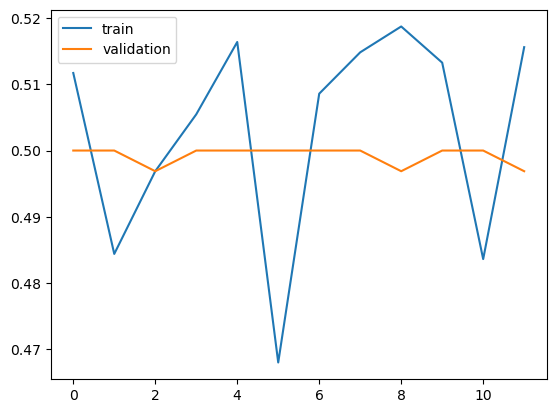

In [7]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [8]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=256, verbose=1)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - acc: 0.5286 - loss: 0.6852


[0.6859657168388367, 0.5400000214576721]

In [1]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], p=0.5,
    )

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [2]:
train_dir = './datasets/animals/train/'
test_dir = './datasets/animals/test/'
validation_dir = './datasets/animals/validation/'

train_generator = idg.flow_from_directory(
    train_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

test_generator = idg.flow_from_directory(
    test_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

validation_generator = idg.flow_from_directory(
    validation_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

print(train_generator.class_indices)

Found 1280 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
{'dogs': 0, 'wolves': 1}


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=512, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=1024, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=1024, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=1024, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=1024, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=2048, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=2048, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=2048, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Conv2D(filters=2048, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(400, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 244, 244, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 244, 244, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 244, 244, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 244, 244, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 244, 244, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 122, 122, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 122, 122, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 122, 122, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 176,969,441 (675.08 MB)

 Trainable params: 176,953,313 (675.02 MB)

 Non-trainable params: 16,128 (63.00 KB)

In [7]:
from tensorflow.keras.losses import BinaryCrossentropy
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=6,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=32, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 8460s 212s/step - acc: 0.4797 - loss: 1.0562 - val_acc: 0.5000 - val_loss: 7539.1982 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 8452s 212s/step - acc: 0.5098 - loss: 0.7704 - val_acc: 0.5000 - val_loss: 314.8029 - learning_rate: 0.0010
Epoch 3/20
34/40 ━━━━━━━━━━━━━━━━━━━━ 20:04 201s/step - acc: 0.5149 - loss: 0.7454

KeyboardInterrupt: 

Cycle 6 
- 방법이 잘못되었다고 판단.
- 캐글 사이트에서 정확도가 높다는 cnn 모델을 참조

In [1]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], p=0.5,
    )

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [2]:
train_dir = './datasets/animals/train/'
test_dir = './datasets/animals/test/'
validation_dir = './datasets/animals/validation/'

train_generator = idg.flow_from_directory(
    train_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

test_generator = idg.flow_from_directory(
    test_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

validation_generator = idg.flow_from_directory(
    validation_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

print(train_generator.class_indices)

Found 1280 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
{'dogs': 0, 'wolves': 1}


In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244
CHAN_DIM = 1

input_tensor = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

#CONV -> RELU -> MAXPOOL
x = Conv2D(filters=64, kernel_size=3, padding='same')(input_tensor)
x = Activation('relu')(x)
x = BatchNormalization(axis=CHAN_DIM)(x)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dropout(rate = 0.25)(x)

#(CONV -> RELU) * 2 -> AVGPOOL
x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization(axis=CHAN_DIM)(x)
x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization(axis=CHAN_DIM)(x)
#x = AveragePooling2D(pool_size=(3,3))(x)
x = Dropout(rate=0.25)(x)

#CONV -> RELU -> MAXPOOL
x = Conv2D(filters=256, kernel_size=(3,3), padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization(axis=CHAN_DIM)(x)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dropout(rate=0.25)(x)

#CONV -> RELU -> AVGPOOL
x = Conv2D(filters=512, kernel_size=(3,3), padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization(axis=CHAN_DIM)(x)
#x = AveragePooling2D(pool_size=(3,3))(x)
x = Dropout(rate=0.25)(x)

#DENSE -> RELU
x = Flatten()(x)
x = Dense(1024)(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(rate=0.25)(x)

#DENSE -> RELU
x = Dense(512)(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(rate=0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 244, 244, 64)        │             976 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 81, 81, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 81, 81, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 81, 81, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 81, 81, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 81, 81, 128)         │             324 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 81, 81, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 81, 81, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 81, 81, 128)         │             324 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 81, 81, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 81, 81, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 81, 81, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 81, 81, 256)         │             324 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 27, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 27, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 27, 27, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 384,439,049 (1.43 GB)

 Trainable params: 384,434,949 (1.43 GB)

 Non-trainable params: 4,100 (16.02 KB)

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=6,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=32, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - acc: 0.5051 - loss: 1.1272 - val_acc: 0.4906 - val_loss: 1.0843 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - acc: 0.5693 - loss: 0.7621 - val_acc: 0.5000 - val_loss: 0.7602 - learning_rate: 0.0010
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - acc: 0.5173 - loss: 0.7763 - val_acc: 0.5000 - val_loss: 1.1913 - learning_rate: 0.0010
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - acc: 0.5699 - loss: 0.7364 - val_acc: 0.5000 - val_loss: 1.2350 - learning_rate: 0.0010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - acc: 0.5619 - loss: 0.7261 - val_acc: 0.5000 - val_loss: 0.8108 - learning_rate: 1.0000e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - acc: 0.5581 - loss: 0.7328 - val_acc: 0.5000 - val_loss: 0.7928 - learning_rate: 1.0000e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - acc: 0.5500 - loss: 0.7528 - val_acc: 0.5000 - val_loss: 0.7581 - learning_rate: 1.0000e-05
E

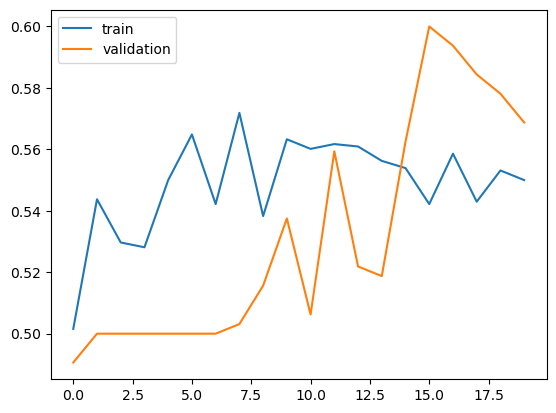

In [16]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [17]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=32, verbose=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 511ms/step - acc: 0.5825 - loss: 0.6525


[0.6662540435791016, 0.5774999856948853]

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model.load_weights('./callback_files/weights.020-0.6583-0.5383.weights.h5')

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=6,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=32, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 922ms/step - acc: 0.5674 - loss: 0.7151 - val_acc: 0.5688 - val_loss: 0.6676 - learning_rate: 1.0000e-06
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 922ms/step - acc: 0.5355 - loss: 0.7368 - val_acc: 0.5813 - val_loss: 0.6704 - learning_rate: 1.0000e-06
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 923ms/step - acc: 0.5633 - loss: 0.7312 - val_acc: 0.5813 - val_loss: 0.6698 - learning_rate: 1.0000e-06
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 923ms/step - acc: 0.5700 - loss: 0.7008 - val_acc: 0.5688 - val_loss: 0.6642 - learning_rate: 1.0000e-07
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 933ms/step - acc: 0.5857 - loss: 0.6837 - val_acc: 0.5594 - val_loss: 0.6697 - learning_rate: 1.0000e-07
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 923ms/step - acc: 0.5706 - loss: 0.7038 - val_acc: 0.5875 - val_loss: 0.6606 - learning_rate: 1.0000e-07
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 922ms/step - acc: 0.5739 - loss: 0.7121 - val_acc: 0.5781 - val_loss: 0.6606

In [12]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=32, verbose=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - acc: 0.5490 - loss: 0.6698


[0.6693879961967468, 0.5649999976158142]

Cycle 7

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244
CHAN_DIM = 1

input_tensor = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

#CONV -> RELU -> MAXPOOL
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(0.01))(input_tensor)
x = Activation('relu')(x)
x = BatchNormalization(axis=CHAN_DIM)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(rate = 0.25)(x)

#(CONV -> RELU) * 2 -> AVGPOOL
x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(0.01))(x)
x = Activation('relu')(x)
x = BatchNormalization(axis=CHAN_DIM)(x)
x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization(axis=CHAN_DIM)(x)
x = AveragePooling2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

#CONV -> RELU -> MAXPOOL
x = Conv2D(filters=256, kernel_size=(3,3), padding='same', kernel_regularizer=l2(0.01))(x)
x = Activation('relu')(x)
x = BatchNormalization(axis=CHAN_DIM)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

#CONV -> RELU -> AVGPOOL
x = Conv2D(filters=512, kernel_size=(3,3), padding='same', kernel_regularizer=l2(0.01))(x)
x = Activation('relu')(x)
x = BatchNormalization(axis=CHAN_DIM)(x)
#x = AveragePooling2D(pool_size=(3,3))(x)
x = Dropout(rate=0.25)(x)

#DENSE -> RELU
x = Flatten()(x)
x = Dense(1024)(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(rate=0.25)(x)

#DENSE -> RELU
x = Dense(512)(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(rate=0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 244, 244, 64)        │             976 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 122, 122, 128)       │             488 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 122, 122, 128)       │             488 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 61, 61, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 61, 61, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 61, 61, 256)         │             244 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 30, 30, 256)         │              

 Total params: 474,092,557 (1.77 GB)

 Trainable params: 474,088,327 (1.77 GB)

 Non-trainable params: 4,230 (16.52 KB)

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=6,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=32, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - acc: 0.5205 - loss: 6.8369 - val_acc: 0.4938 - val_loss: 4.8932 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - acc: 0.5208 - loss: 4.2242 - val_acc: 0.4812 - val_loss: 2.9998 - learning_rate: 0.0010
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - acc: 0.5749 - loss: 2.4763 - val_acc: 0.5094 - val_loss: 1.7474 - learning_rate: 0.0010
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - acc: 0.5414 - loss: 1.6515 - val_acc: 0.5250 - val_loss: 1.3210 - learning_rate: 0.0010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - acc: 0.5694 - loss: 1.2234 - val_acc: 0.5344 - val_loss: 1.0219 - learning_rate: 0.0010
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - acc: 0.5747 - loss: 1.0251 - val_acc: 0.5000 - val_loss: 0.9150 - learning_rate: 0.0010
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - acc: 0.5613 - loss: 0.8977 - val_acc: 0.5000 - val_loss: 0.9150 - learning_rate: 0.0010
Epoch 8/20
40

In [21]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=32, verbose=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 585ms/step - acc: 0.6063 - loss: 0.6928


[0.7008259296417236, 0.5975000262260437]

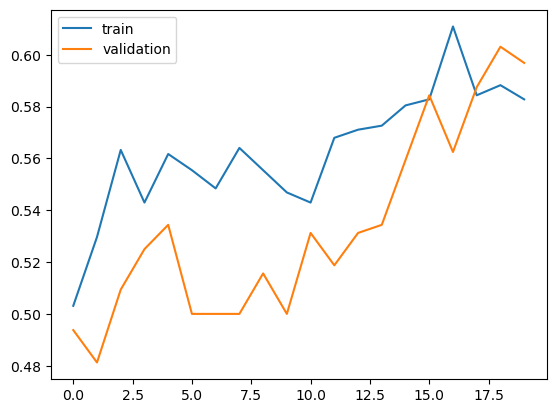

In [22]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

Cycle 8

In [ ]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.CenterCrop(height=100, width=100, p=0.5)
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], p=0.5,
    )

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244
CHAN_DIM = 1

input_tensor = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=16, kernel_size=3, padding='same')(input_tensor)
x = Activation('relu')(x)


x = Conv2D(filters=16, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 1))(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', strides=2, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

#DENSE -> RELU
x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu')(x)

x = Dense(200, activation='relu')(x)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 244, 244, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_42 (Activation)           │ (None, 244, 244, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 244, 244, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_43 (Activation)           │ (None, 244, 244, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 122, 244, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 61, 122, 32)         │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 61, 122, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_44 (Activation)           │ (None, 61, 122, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 61, 122, 32)         │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 61, 122, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_45 (Activation)           │ (None, 61, 122, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 31, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 31, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_46 (Activation)           │ (None, 31, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 31, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 31, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_47 (Activation)           │ (None, 31, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 16, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 19,254,317 (73.45 MB)

 Trainable params: 19,253,677 (73.45 MB)

 Non-trainable params: 640 (2.50 KB)

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=6,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=8, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb], shuffle=True)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 529ms/step - acc: 0.5236 - loss: 5.2799 - val_acc: 0.4969 - val_loss: 0.7141 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 302ms/step - acc: 0.5098 - loss: 1.2709 - val_acc: 0.5031 - val_loss: 0.7075 - learning_rate: 0.0010
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 304ms/step - acc: 0.5250 - loss: 0.8727 - val_acc: 0.5625 - val_loss: 0.6846 - learning_rate: 0.0010
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 307ms/step - acc: 0.5618 - loss: 0.7779 - val_acc: 0.5719 - val_loss: 0.7192 - learning_rate: 0.0010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 304ms/step - acc: 0.5269 - loss: 0.8359 - val_acc: 0.5031 - val_loss: 0.7710 - learning_rate: 0.0010
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 305ms/step - acc: 0.5462 - loss: 0.7808 - val_acc: 0.5344 - val_loss: 0.6898 - learning_rate: 1.0000e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - acc: 0.5578 - loss: 0.6754 - val_acc: 0.5437 - val_loss: 0.6853 - learning_rate: 1.

Cycle 9
- CenterCrop으로 변경

In [37]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.CenterCrop(height=244, width=244, p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], p=0.5,
    )

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [38]:
train_dir = './datasets/animals/train/'
test_dir = './datasets/animals/test/'
validation_dir = './datasets/animals/validation/'

train_generator = idg.flow_from_directory(
    train_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

test_generator = idg.flow_from_directory(
    test_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

validation_generator = idg.flow_from_directory(
    validation_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

print(train_generator.class_indices)

Found 1280 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
{'dogs': 0, 'wolves': 1}


In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244
CHAN_DIM = 1

input_tensor = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=16, kernel_size=3, padding='same')(input_tensor)
x = Activation('relu')(x)


x = Conv2D(filters=16, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,1)(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,2)(x)

#DENSE -> RELU
x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu')(x)

x = Dense(200, activation='relu')(x)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 244, 244, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_84 (Activation)           │ (None, 244, 244, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 244, 244, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_85 (Activation)           │ (None, 244, 244, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 243, 243, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 122, 122, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_66               │ (None, 122, 122, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_86 (Activation)           │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 122, 122, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_67               │ (None, 122, 122, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_87 (Activation)           │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_68               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_88 (Activation)           │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_69               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_89 (Activation)           │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 8,996,013 (34.32 MB)

 Trainable params: 8,995,117 (34.31 MB)

 Non-trainable params: 896 (3.50 KB)

In [52]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(1e-5), loss=BinaryCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=8, epochs=30, callbacks=[mcp_cb, rlr_cb, ely_cb], shuffle=True)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 622ms/step - acc: 0.5122 - loss: 0.7818 - val_acc: 0.4969 - val_loss: 0.6930 - learning_rate: 1.0000e-05
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 656ms/step - acc: 0.5061 - loss: 0.7355 - val_acc: 0.5000 - val_loss: 0.6958 - learning_rate: 1.0000e-05
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 621ms/step - acc: 0.5326 - loss: 0.7082 - val_acc: 0.4750 - val_loss: 0.6982 - learning_rate: 1.0000e-05
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 442ms/step - acc: 0.5548 - loss: 0.6953 - val_acc: 0.4969 - val_loss: 0.6954 - learning_rate: 1.0000e-06
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 422ms/step - acc: 0.5638 - loss: 0.6899 - val_acc: 0.5125 - val_loss: 0.6961 - learning_rate: 1.0000e-06
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 425ms/step - acc: 0.5416 - loss: 0.6886 - val_acc: 0.4844 - val_loss: 0.6956 - learning_rate: 1.0000e-07
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 427ms/step - acc: 0.5805 - loss: 0.6954 - val_acc: 0.5188 - val_loss: 0.6931

In [53]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8, verbose=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - acc: 0.5880 - loss: 0.7009


[0.6831761002540588, 0.5799999833106995]

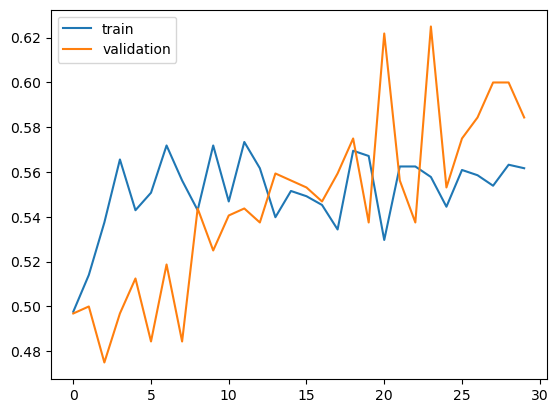

In [54]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

Cycle 10


In [55]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.CenterCrop(height=244, width=244, p=1),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], p=0.5,
    )

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [56]:
train_dir = './datasets/animals/train/'
test_dir = './datasets/animals/test/'
validation_dir = './datasets/animals/validation/'

train_generator = idg.flow_from_directory(
    train_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

test_generator = idg.flow_from_directory(
    test_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

validation_generator = idg.flow_from_directory(
    validation_dir,
    target_size= (244, 244),
    batch_size= 32,
    class_mode = 'binary'
)

print(train_generator.class_indices)

Found 1280 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
{'dogs': 0, 'wolves': 1}


In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244
CHAN_DIM = 1

input_tensor = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=16, kernel_size=3, padding='same')(input_tensor)
x = Activation('relu')(x)


x = Conv2D(filters=16, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,1)(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,2)(x)

#DENSE -> RELU
x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu')(x)

x = Dense(200, activation='relu')(x)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (None, 244, 244, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_92 (Activation)           │ (None, 244, 244, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (None, 244, 244, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_93 (Activation)           │ (None, 244, 244, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 243, 243, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 122, 122, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 122, 122, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_94 (Activation)           │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 122, 122, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 122, 122, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_95 (Activation)           │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_96 (Activation)           │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_75               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_97 (Activation)           │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 8,996,013 (34.32 MB)

 Trainable params: 8,995,117 (34.31 MB)

 Non-trainable params: 896 (3.50 KB)

In [58]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(1e-5), loss=BinaryCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=8, epochs=30, callbacks=[mcp_cb, rlr_cb, ely_cb], shuffle=True)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 437ms/step - acc: 0.5378 - loss: 0.8313 - val_acc: 0.5000 - val_loss: 0.6949 - learning_rate: 1.0000e-05
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 424ms/step - acc: 0.5242 - loss: 0.7470 - val_acc: 0.4812 - val_loss: 0.6945 - learning_rate: 1.0000e-05
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 420ms/step - acc: 0.5440 - loss: 0.7229 - val_acc: 0.4906 - val_loss: 0.6945 - learning_rate: 1.0000e-05
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 426ms/step - acc: 0.5591 - loss: 0.6932 - val_acc: 0.4844 - val_loss: 0.6940 - learning_rate: 1.0000e-05
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 424ms/step - acc: 0.5448 - loss: 0.6957 - val_acc: 0.5031 - val_loss: 0.6948 - learning_rate: 1.0000e-05
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 422ms/step - acc: 0.5302 - loss: 0.6915 - val_acc: 0.5031 - val_loss: 0.6944 - learning_rate: 1.0000e-05
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 425ms/step - acc: 0.5473 - loss: 0.6874 - val_acc: 0.5375 - val_loss: 0.6907

In [60]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy

model.load_weights('./callback_files/weights.023-0.7201-0.6000.weights.h5')
model.compile(optimizer=Adam(1e-7), loss=BinaryCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    # 모든 epoch의 파일을 저장하지 않고 좋은 성능이라 판단될 경우만 저장할 때 True설정
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min'
)

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=8, epochs=30, callbacks=[mcp_cb, rlr_cb, ely_cb], shuffle=True)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 436ms/step - acc: 0.5705 - loss: 0.6692 - val_acc: 0.5500 - val_loss: 0.7167 - learning_rate: 1.0000e-07
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 424ms/step - acc: 0.5673 - loss: 0.6643 - val_acc: 0.5531 - val_loss: 0.6954 - learning_rate: 1.0000e-07
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 429ms/step - acc: 0.5802 - loss: 0.6661 - val_acc: 0.5250 - val_loss: 0.7232 - learning_rate: 1.0000e-07
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 430ms/step - acc: 0.5698 - loss: 0.6516 - val_acc: 0.5406 - val_loss: 0.7160 - learning_rate: 1.0000e-07
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 425ms/step - acc: 0.5765 - loss: 0.6589 - val_acc: 0.5312 - val_loss: 0.7315 - learning_rate: 1.0000e-08
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 427ms/step - acc: 0.5329 - loss: 0.6891 - val_acc: 0.5437 - val_loss: 0.6954 - learning_rate: 1.0000e-08
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 422ms/step - acc: 0.6035 - loss: 0.6643 - val_acc: 0.5469 - val_loss: 0.7104

In [61]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8, verbose=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - acc: 0.5238 - loss: 0.6847


[0.6864768862724304, 0.5224999785423279]

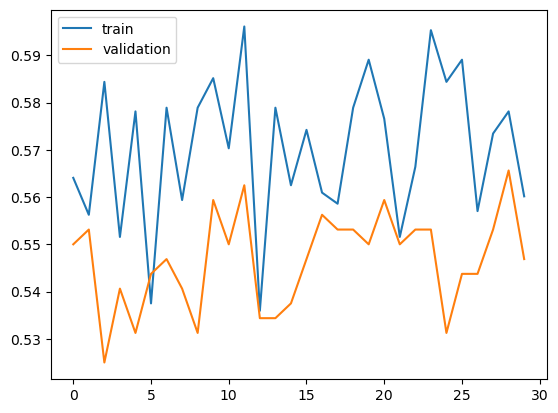

In [62]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [ ]:
weights.028-0.7102-0.5734.weights.h5

In [90]:
model.load_weights('./callback_files/weights.028-0.7102-0.5734.weights.h5')

In [91]:
model.evaluate(test_generator, batch_size=8, verbose=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - acc: 0.5305 - loss: 0.7032


[0.7014061808586121, 0.5375000238418579]

Found 2000 images belonging to 2 classes.
{'dogs': 0, 'wolves': 1}


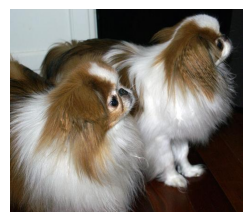

In [89]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/animals/original/'

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(
    root,
    target_size=(244,244),
    batch_size=8,
    class_mode='binary'
)

print(generator.class_indices)
image = cv2.cvtColor(cv2.imread(generator.filepaths[1]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'늑대'

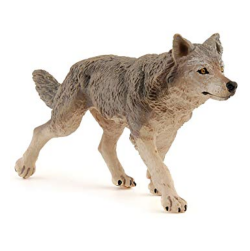

In [94]:
import numpy as np
import cv2

image = cv2.cvtColor(cv2.imread('./datasets/animals/original/wolves/wolves10.png'), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
resized_image = np.expand_dims(resized_image, axis=0)
show_image(image)

class_names = ['개', '늑대']
class_names[int(model.predict(resized_image, batch_size=8)[0][0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'개'

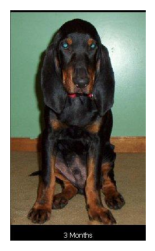

In [95]:
import numpy as np
import cv2

image = cv2.cvtColor(cv2.imread('./datasets/animals/original/dogs/dogs140.png'), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
resized_image = np.expand_dims(resized_image, axis=0)
show_image(image)

class_names = ['개', '늑대']
class_names[int(model.predict(resized_image, batch_size=8)[0][0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'늑대'

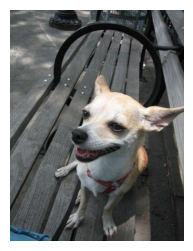

In [96]:
import numpy as np
import cv2

image = cv2.cvtColor(cv2.imread('./datasets/animals/original/dogs/dogs1.png'), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
resized_image = np.expand_dims(resized_image, axis=0)
show_image(image)

class_names = ['개', '늑대']
class_names[int(model.predict(resized_image, batch_size=8)[0][0])]